# Testing Multiple colloidal solution preparation
# By comparing the signal and the reduction time

In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import re

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Carbendazim

In [42]:
f_sup, car_data = rd.read_dir_tiff_files('../data/20211029 multiple colloidal SERS test/1')

In [43]:
car_data['1_1_min_coll_6X6_spectral_mapping_1s_msrmnt_4'].shape

(36, 1600)

In [44]:
sorted_names = ['20_sec', '30_sec', '1_min', '2_min', '3_min', '10_min']

In [54]:
for name in sorted_names:
    exec(f"car_{name} = [[], [], [], []]")

In [55]:
# Step 2: Assign values to the created variables
for key, value in car_data.items():
    match = re.search(r'(\d+)_(\d+_sec|\d+_min)_coll_6X6_spectral_mapping_1s_msrmnt_(\d+)', key)
    if match:
        msrmnt_number = int(match.group(3)) - 1  # Subtract 1 to make it zero-indexed
        time_key = match.group(2)
        exec(f"car_{time_key}[{msrmnt_number}].append(value)")

In [57]:
_, car_1_min_1_check = rd.read_data('../data/20211029 multiple colloidal SERS test/1/1_1_min_coll_6X6_spectral_mapping_1s_msrmnt_1.tif')

In [58]:
car_1_min[0][0] == car_1_min_1_check

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [65]:
# Go through all of the variables and average each sublist of arrays
# Assign the averaged array to the variable

for name in sorted_names:
    for i in range(4):  # Assuming there are 4 sublists
        exec(f"car_{name}_avg_{i} = np.mean(car_{name}[{i}][0], axis=0)")

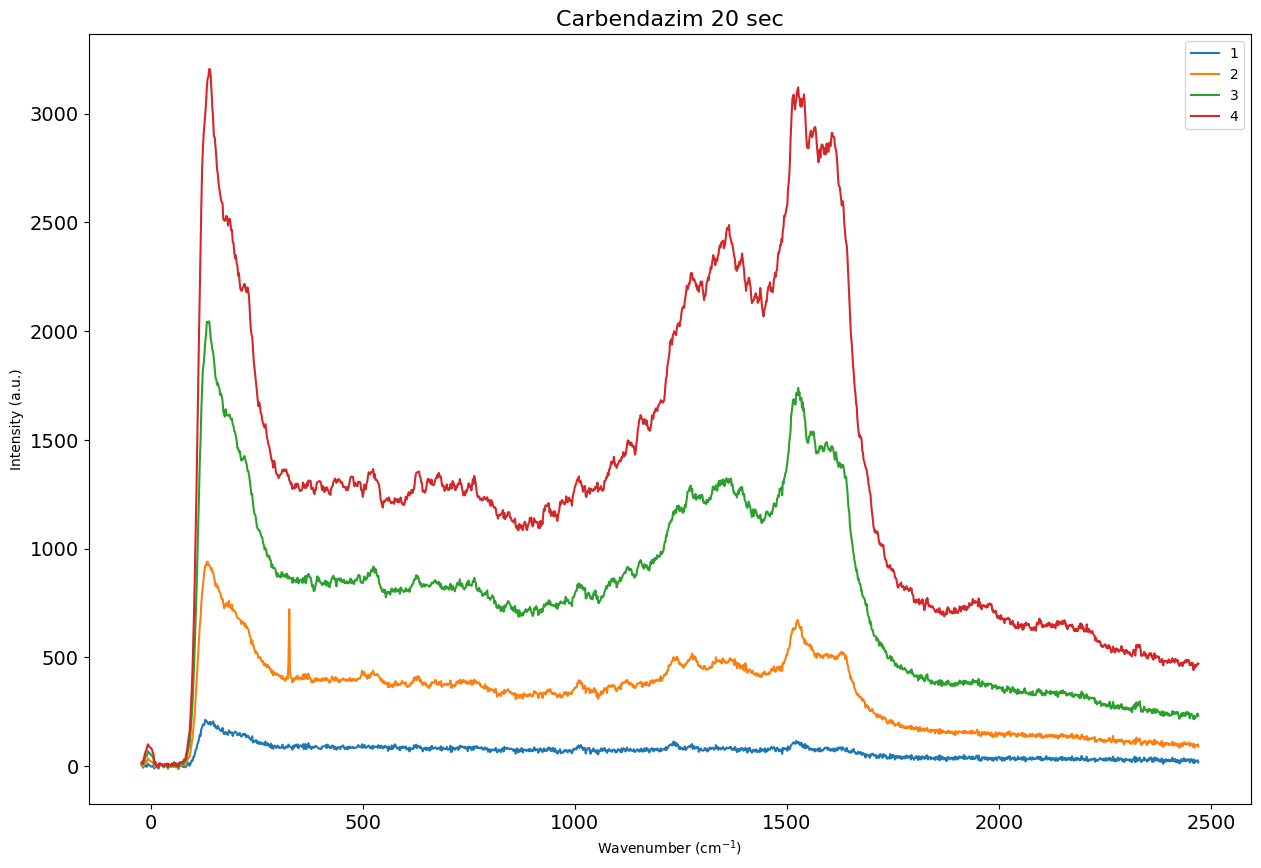

In [73]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_20_sec_avg_0)
plt.plot(f_sup, car_20_sec_avg_1)
plt.plot(f_sup, car_20_sec_avg_2)
plt.plot(f_sup, car_20_sec_avg_3)
plt.legend(['1', '2', '3', '4'])
plt.title('Carbendazim 20 sec', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

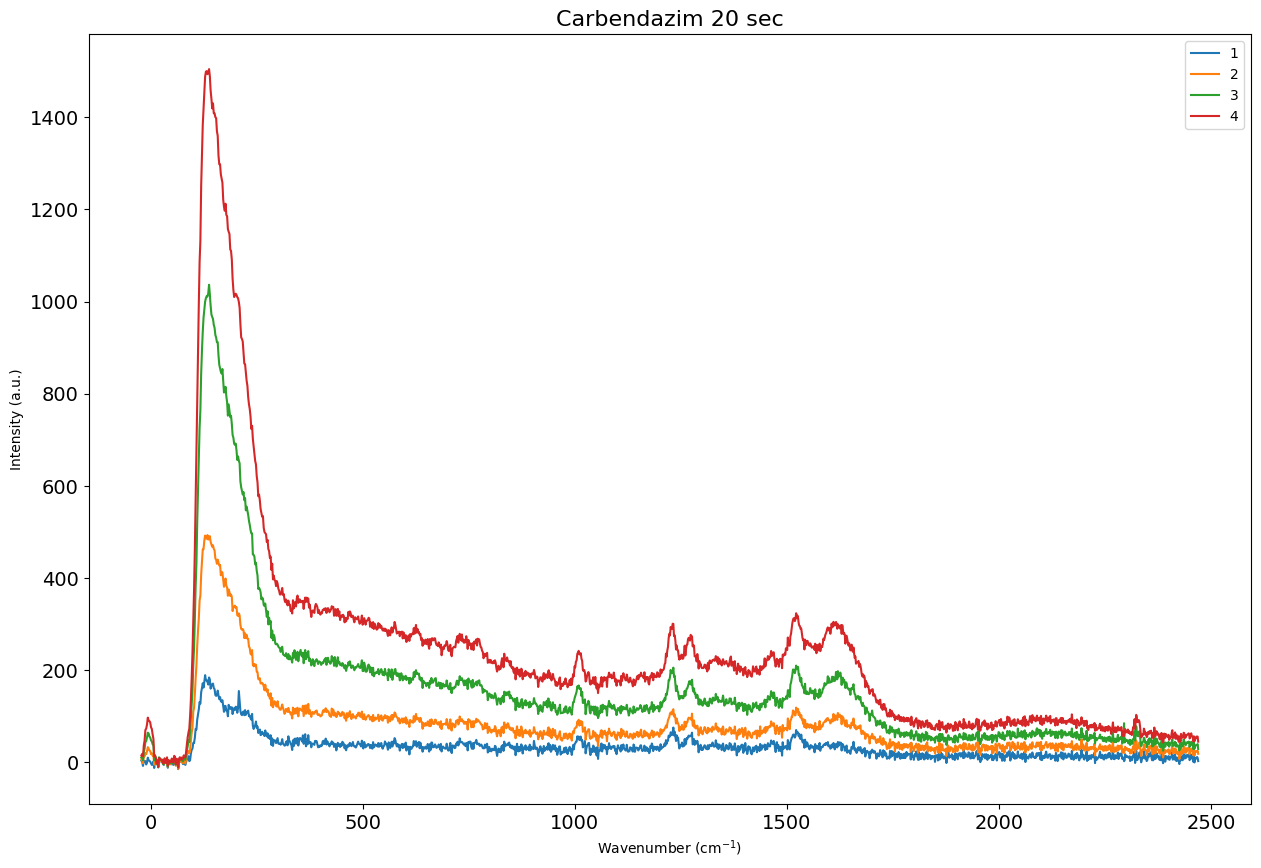

In [74]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_30_sec_avg_0)
plt.plot(f_sup, car_30_sec_avg_1)
plt.plot(f_sup, car_30_sec_avg_2)
plt.plot(f_sup, car_30_sec_avg_3)
plt.legend(['1', '2', '3', '4'])
plt.title('Carbendazim 20 sec', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

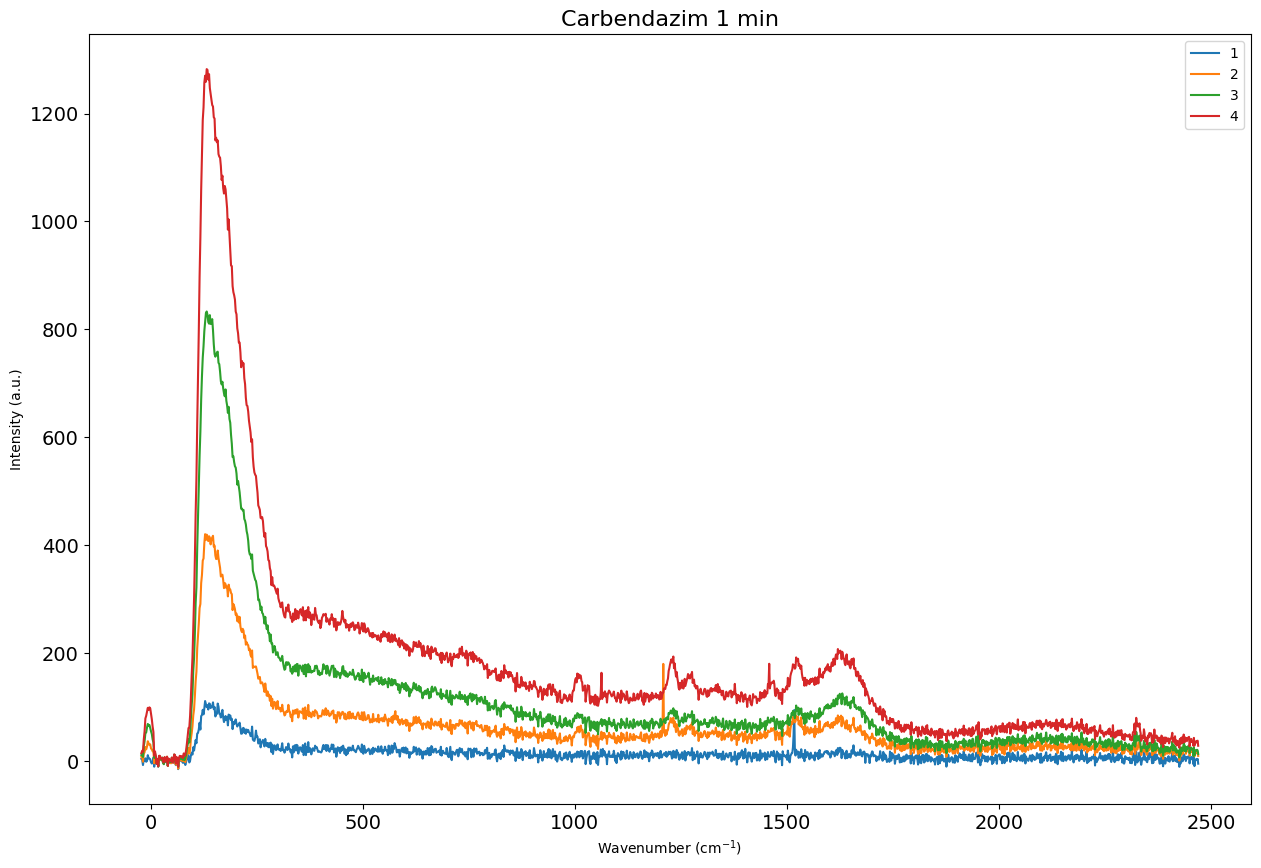

In [70]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_1_min_avg_0)
plt.plot(f_sup, car_1_min_avg_1)
plt.plot(f_sup, car_1_min_avg_2)
plt.plot(f_sup, car_1_min_avg_3)
plt.legend(['1', '2', '3', '4'])
plt.title('Carbendazim 1 min', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

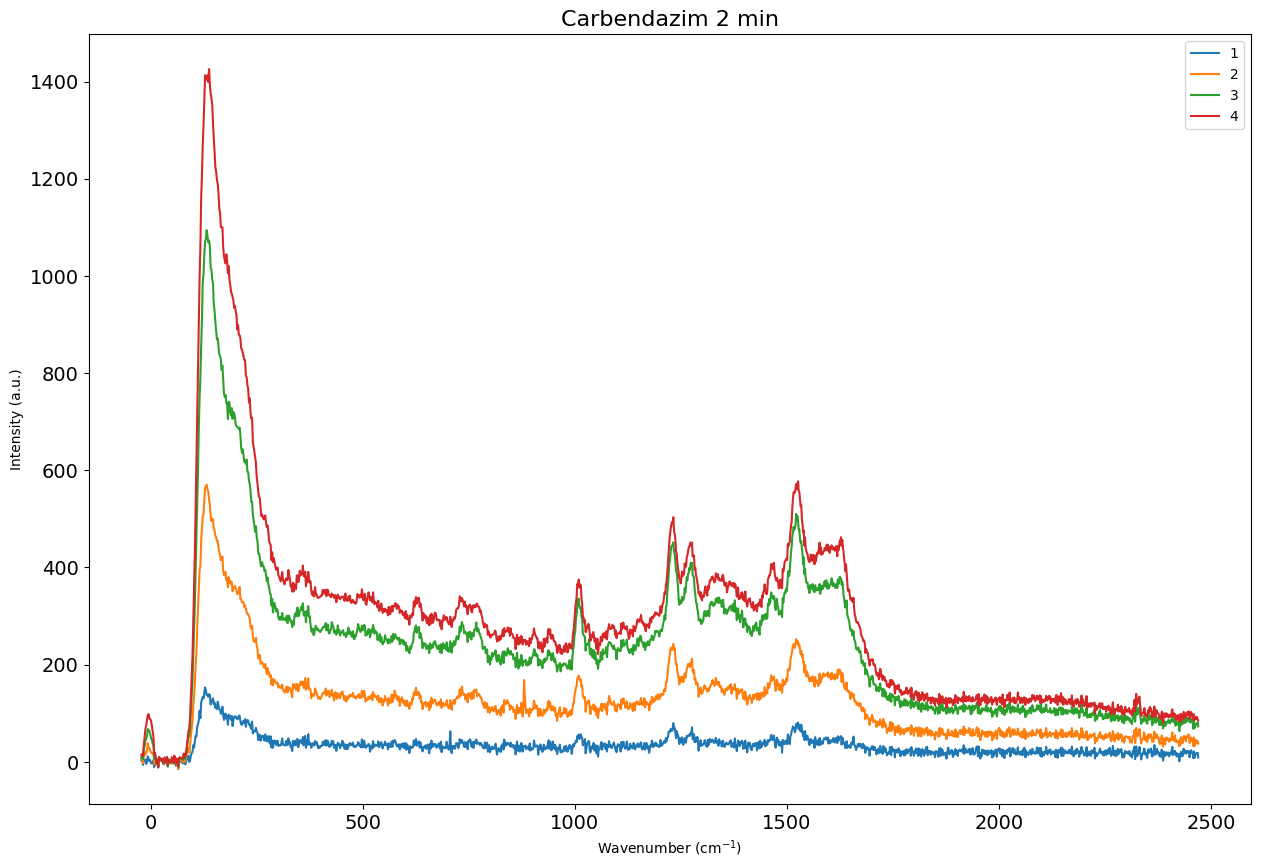

In [78]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_2_min_avg_0)
plt.plot(f_sup, car_2_min_avg_1)
plt.plot(f_sup, car_2_min_avg_2)
plt.plot(f_sup, car_2_min_avg_3)
plt.legend(['1', '2', '3', '4'])
plt.title('Carbendazim 2 min', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

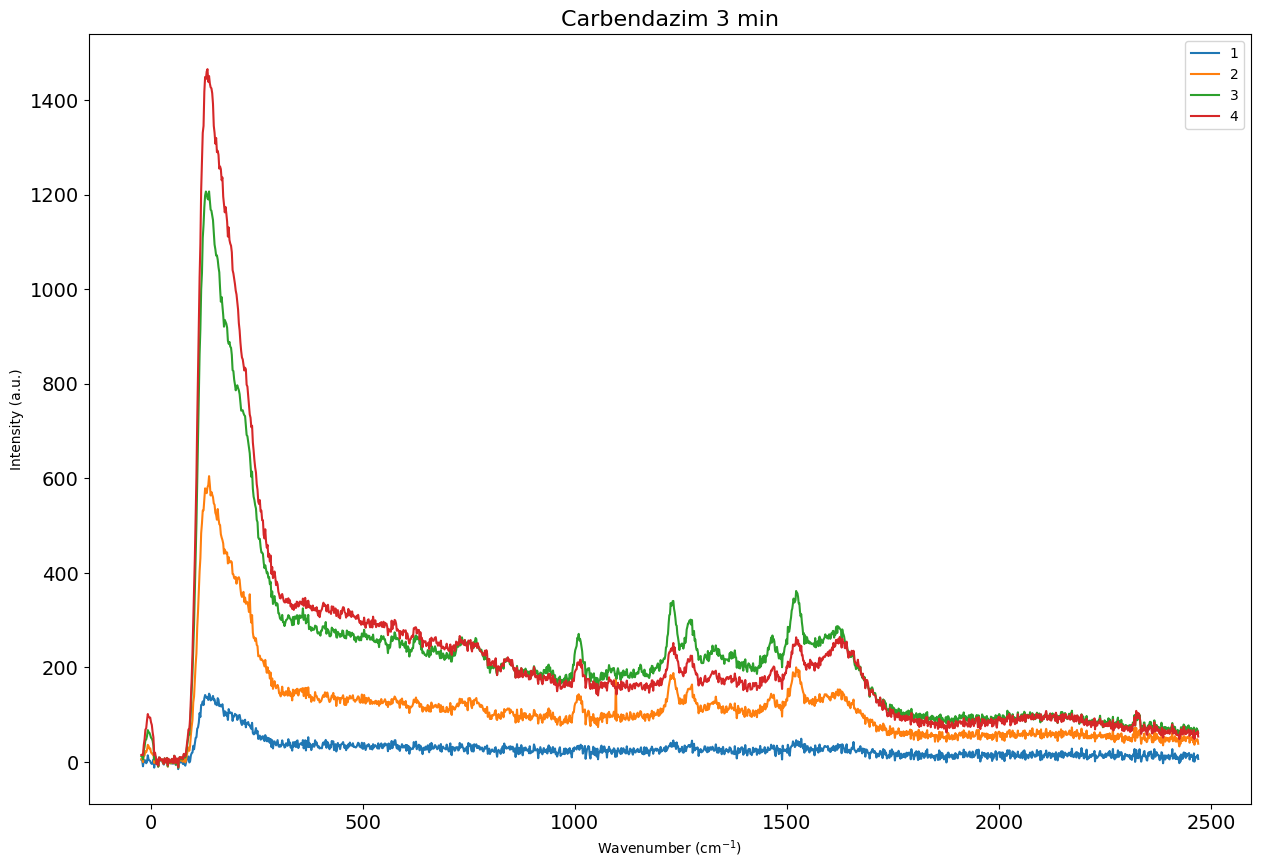

In [79]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_3_min_avg_0)
plt.plot(f_sup, car_3_min_avg_1)
plt.plot(f_sup, car_3_min_avg_2)
plt.plot(f_sup, car_3_min_avg_3)
plt.legend(['1', '2', '3', '4'])
plt.title('Carbendazim 3 min', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

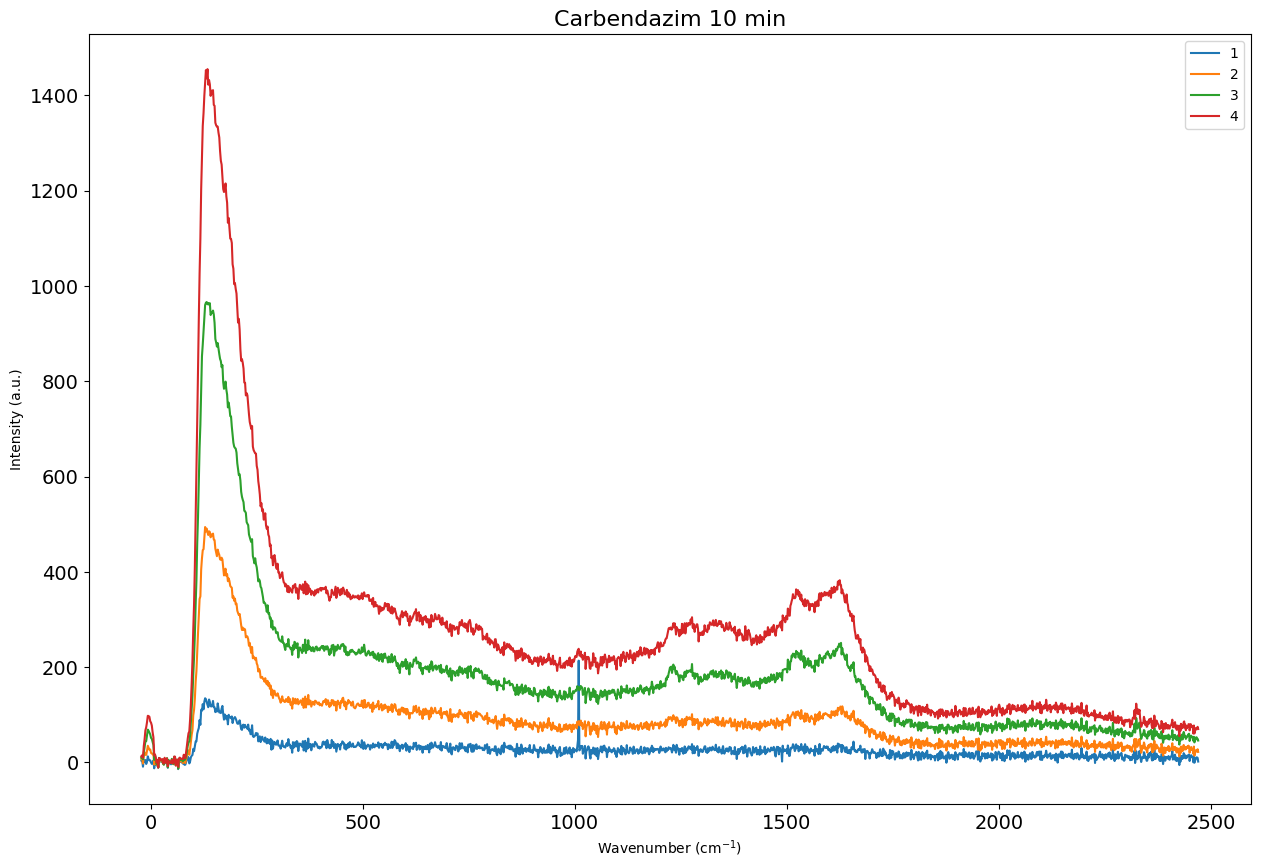

In [80]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_10_min_avg_0)
plt.plot(f_sup, car_10_min_avg_1)
plt.plot(f_sup, car_10_min_avg_2)
plt.plot(f_sup, car_10_min_avg_3)
plt.legend(['1', '2', '3', '4'])
plt.title('Carbendazim 10 min', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

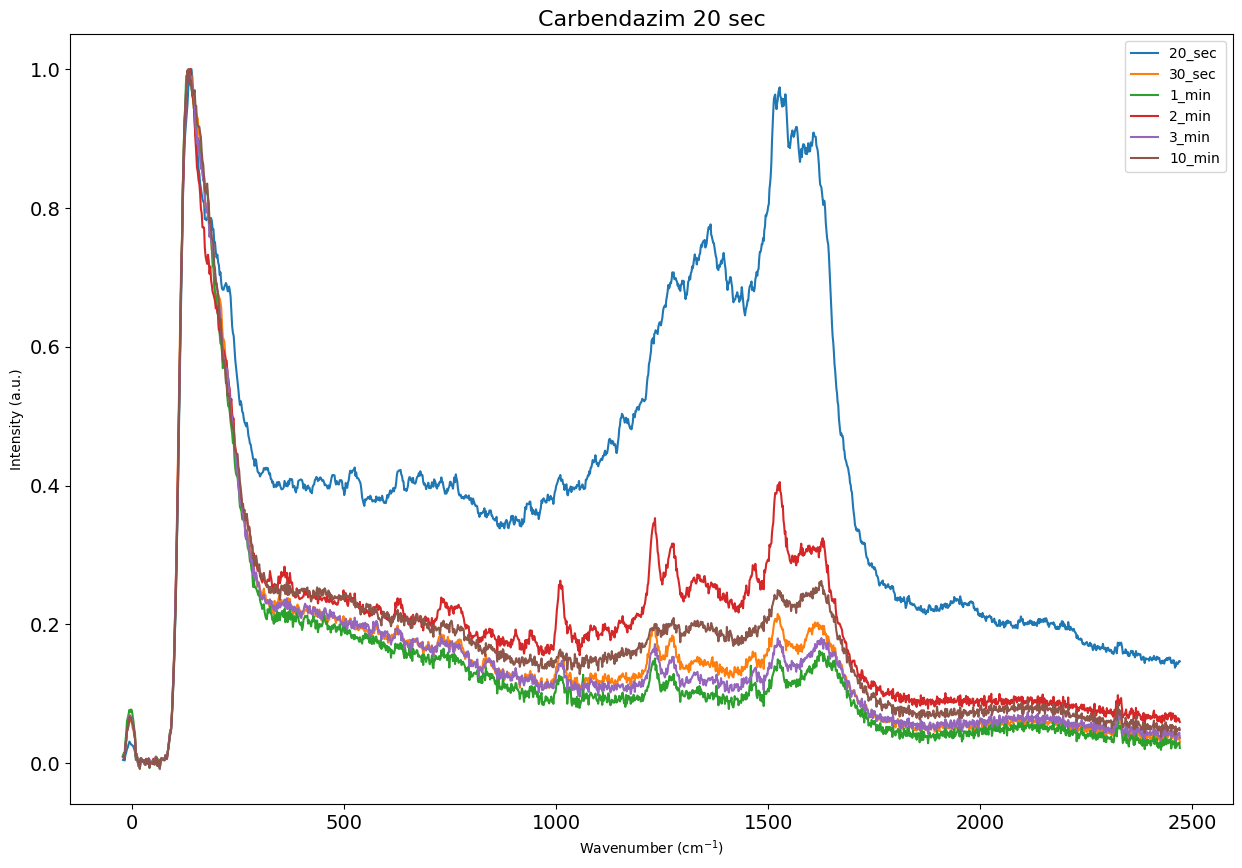

In [83]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, car_20_sec_avg_3 / np.max(car_20_sec_avg_3))
plt.plot(f_sup, car_30_sec_avg_3 / np.max(car_30_sec_avg_3))
plt.plot(f_sup, car_1_min_avg_3 / np.max(car_1_min_avg_3))
plt.plot(f_sup, car_2_min_avg_3 / np.max(car_2_min_avg_3))
plt.plot(f_sup, car_3_min_avg_3 / np.max(car_3_min_avg_3))
plt.plot(f_sup, car_10_min_avg_3 / np.max(car_10_min_avg_3))
plt.legend(sorted_names)
plt.title('Carbendazim 20 sec', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### New Carbendazim solution

In [85]:
_ , car_data_new = rd.read_dir_tiff_files('../data/20211029 multiple colloidal SERS test/1_new')

In [84]:
for name in sorted_names:
    exec(f"car_new_{name} = [[], [], [], []]")

In [86]:
# Step 2: Assign values to the created variables
for key, value in car_data_new.items():
    match = re.search(r'(\d+)_0s_aftermixing_(\d+_sec|\d+_min)_coll_6X6_spectral_mapping_1s_msrmnt_(\d+)', key)
    if match:
        msrmnt_number = int(match.group(3)) - 1  # Subtract 1 to make it zero-indexed
        time_key = match.group(2)
        exec(f"car_new_{time_key}[{msrmnt_number}].append(value)")

In [87]:
# Go through all of the variables and average each sublist of arrays
# Assign the averaged array to the variable

for name in sorted_names:
    for i in range(4):  # Assuming there are 4 sublists
        exec(f"car_new_{name}_avg_{i} = np.mean(car_new_{name}[{i}][0], axis=0)")

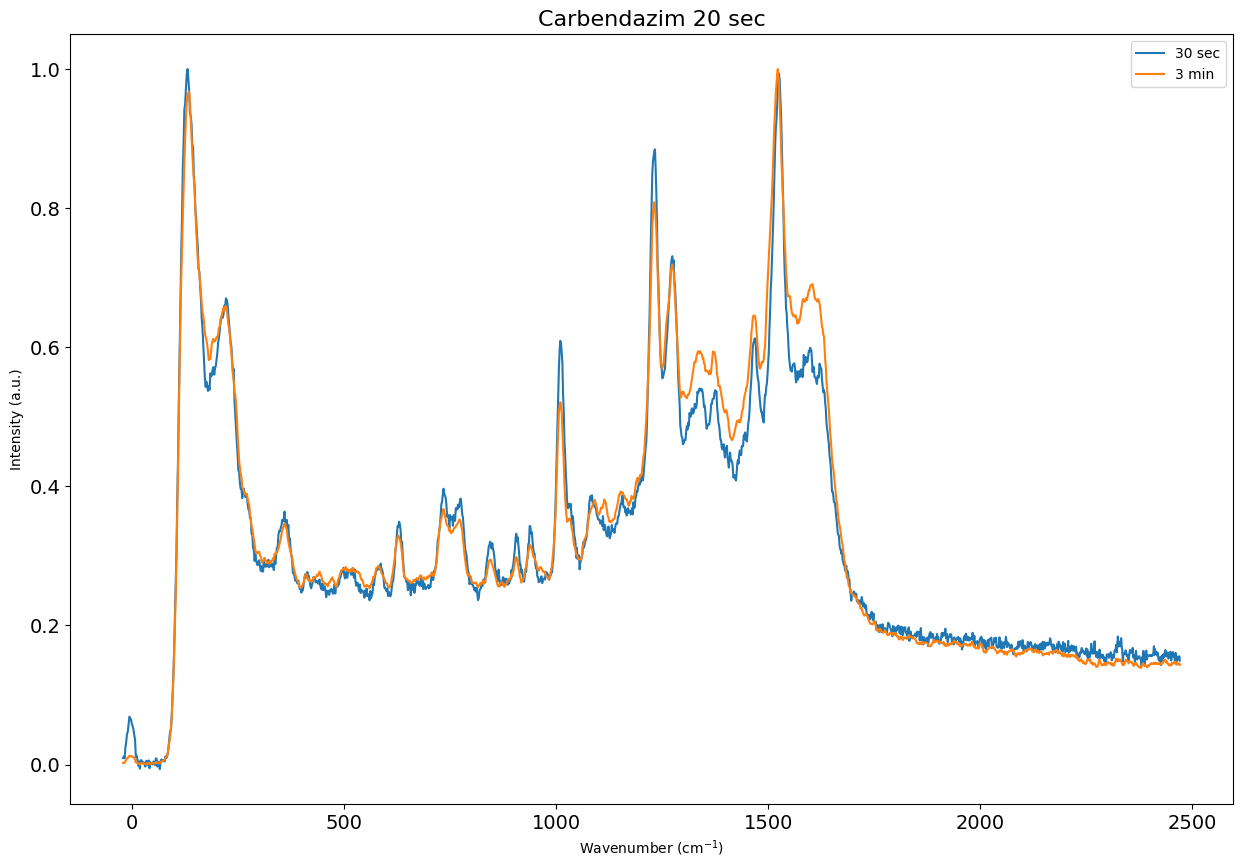

In [107]:
plt.figure(figsize=(15, 10))
# plt.plot(f_sup, car_new_20_sec_avg_3 / np.max(car_new_20_sec_avg_3), label='20 sec')
plt.plot(f_sup, car_new_30_sec_avg_3 / np.max(car_new_30_sec_avg_3), label='30 sec')
# plt.plot(f_sup, car_new_1_min_avg_3 / np.max(car_new_1_min_avg_3), label='1 min')
# plt.plot(f_sup, car_new_2_min_avg_3 / np.max(car_new_2_min_avg_3), label='2 min')
plt.plot(f_sup, car_new_3_min_avg_3 / np.max(car_new_3_min_avg_3), label='3 min')
# plt.plot(f_sup, car_new_10_min_avg_3 / np.max(car_new_10_min_avg_3), label='10 min')
plt.legend()
plt.title('Carbendazim 20 sec', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 4. Acetamiprid

In [89]:
_ , aceta_data = rd.read_dir_tiff_files('../data/20211029 multiple colloidal SERS test/4')

In [90]:
for name in sorted_names:
    exec(f"aceta_{name} = [[], [], [], []]")

In [91]:
# Step 2: Assign values to the created variables
for key, value in aceta_data.items():
    match = re.search(r'(\d+)_(\d+_sec|\d+_min)_coll_6X6_spectral_mapping_1s_msrmnt_(\d+)', key)
    if match:
        msrmnt_number = int(match.group(3)) - 1  # Subtract 1 to make it zero-indexed
        time_key = match.group(2)
        exec(f"aceta_{time_key}[{msrmnt_number}].append(value)")

In [92]:
# Go through all of the variables and average each sublist of arrays
# Assign the averaged array to the variable

for name in sorted_names:
    for i in range(4):  # Assuming there are 4 sublists
        exec(f"aceta_{name}_avg_{i} = np.mean(aceta_{name}[{i}][0], axis=0)")

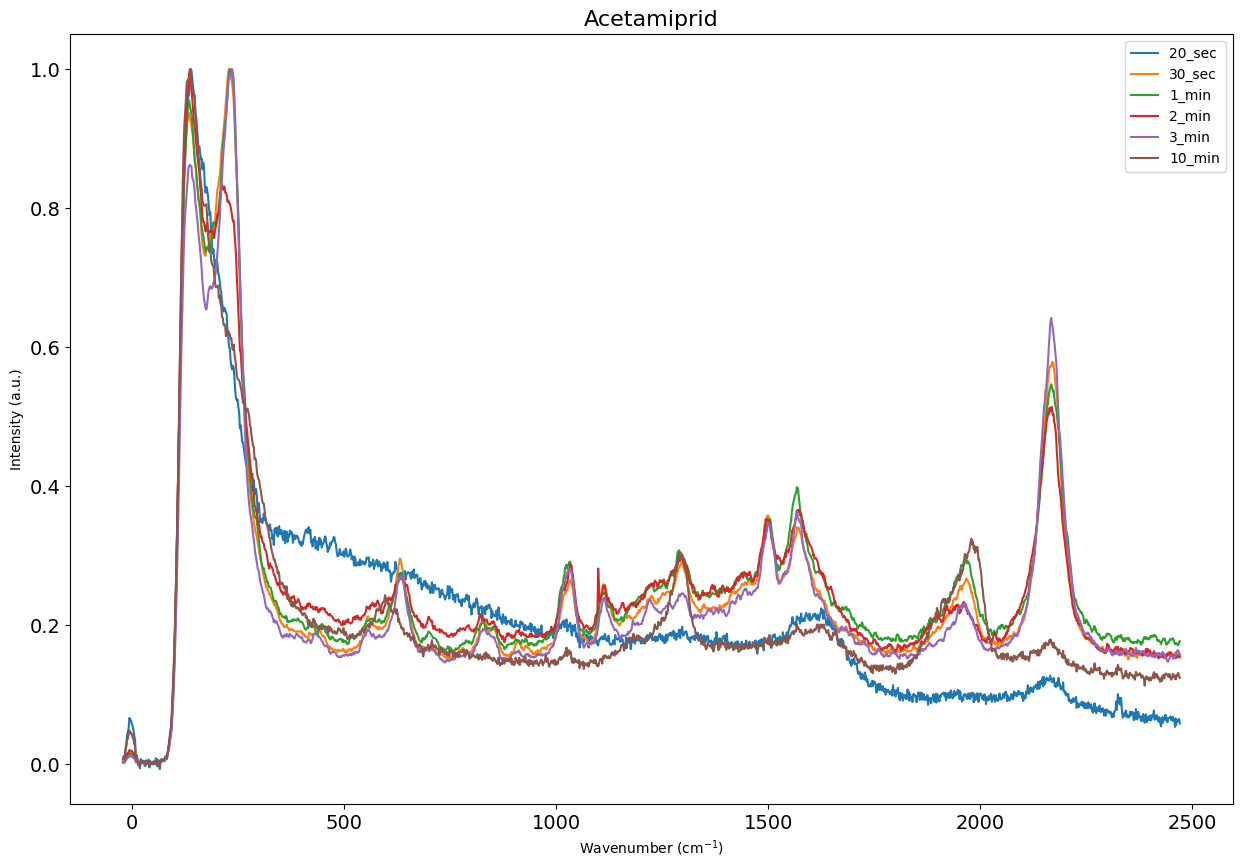

In [93]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, aceta_20_sec_avg_3 / np.max(aceta_20_sec_avg_3))
plt.plot(f_sup, aceta_30_sec_avg_3 / np.max(aceta_30_sec_avg_3))
plt.plot(f_sup, aceta_1_min_avg_3 / np.max(aceta_1_min_avg_3))
plt.plot(f_sup, aceta_2_min_avg_3 / np.max(aceta_2_min_avg_3))
plt.plot(f_sup, aceta_3_min_avg_3 / np.max(aceta_3_min_avg_3))
plt.plot(f_sup, aceta_10_min_avg_3 / np.max(aceta_10_min_avg_3))
plt.legend(sorted_names)
plt.title('Acetamiprid', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 5. Acephate

In [94]:
_ , aceph_data = rd.read_dir_tiff_files('../data/20211029 multiple colloidal SERS test/5')

In [95]:
for name in sorted_names:
    exec(f"aceph_{name} = [[], [], [], []]")

In [96]:
# Step 2: Assign values to the created variables
for key, value in aceph_data.items():
    match = re.search(r'(\d+)_(\d+_sec|\d+_min)_coll_6X6_spectral_mapping_1s_msrmnt_(\d+)', key)
    if match:
        msrmnt_number = int(match.group(3)) - 1  # Subtract 1 to make it zero-indexed
        time_key = match.group(2)
        exec(f"aceph_{time_key}[{msrmnt_number}].append(value)")

In [97]:
# Go through all of the variables and average each sublist of arrays
# Assign the averaged array to the variable

for name in sorted_names:
    for i in range(4):  # Assuming there are 4 sublists
        exec(f"aceph_{name}_avg_{i} = np.mean(aceph_{name}[{i}][0], axis=0)")

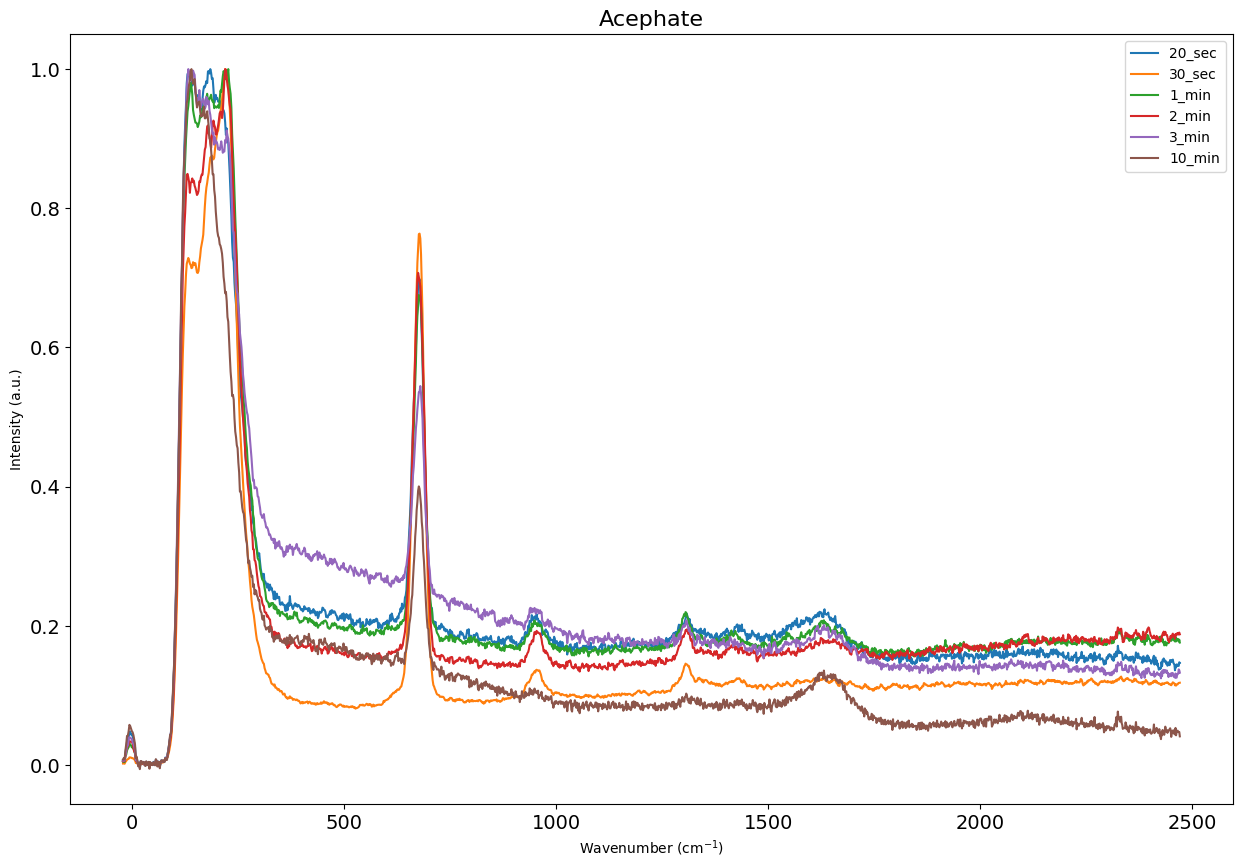

In [98]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, aceph_20_sec_avg_3 / np.max(aceph_20_sec_avg_3))
plt.plot(f_sup, aceph_30_sec_avg_3 / np.max(aceph_30_sec_avg_3))
plt.plot(f_sup, aceph_1_min_avg_3 / np.max(aceph_1_min_avg_3))
plt.plot(f_sup, aceph_2_min_avg_3 / np.max(aceph_2_min_avg_3))
plt.plot(f_sup, aceph_3_min_avg_3 / np.max(aceph_3_min_avg_3))
plt.plot(f_sup, aceph_10_min_avg_3 / np.max(aceph_10_min_avg_3))
plt.legend(sorted_names)
plt.title('Acephate', fontsize=16)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()